# Coding Lab 3: Manifold learning & K-Means clustering

## Overview

In this Coding lab, you will be asked to code some linear algebra problems with NumPy. Use workflow described below for submitting your codes:
1. Fork this repository and clone your fork to your computer. 
2. Read the requirements and complete source script(s). 
3. Commit and push.

Your coding lab **will not be marked**. It is for your practice only.

Reference: sklearn documentation & towardsdatascience

## Questions

### 1. k-means++ and k-means
k-means++ is a method for initialising the k-means algorithm. In practise it often produces better clustering results than naive random initialisation. k-means++ chooses initial clusters as follows:
1. From all input data points, choose a random point as the centre of the first cluster.
2. For every data point not yet chosen, compute its distance $D$ to its nearest centre that has been chosen.
3. From all data point not yet chosen, randomly choose one point as the centre of a new cluster with probability proportional to $D^2$ (you will need to handle data degeneracy, e.g. by adding a small constant to $D$ when all data points have zero distance).
4. Repeat 2-3 until all k centres have been selected

Once all k centres are found, standard k-means is used to cluster data points from the initial centres.

Implement and test k-means++
* In `source.py`, complete the function k_means_pp($X$, $k$) that takes an $N$-by-$d$ matrix $X$ and integer $k$, and returns a $k$-by-$d$ matrix $centroids$ as the $k$ initial centres by k-means++. (1.5 mark)
* In `source.py`, the function k_means($X$, centroids, n_iterations) is written for you. The function runs k-means iteratively for `n_iterations` times from a set of initial cluster centres, and returns a tuple (`which_component`, `centroids`) where `which_component` is an integer array of length $N$ containing values in $[0,k)$ indicating which cluster the data points belong to, and `centroids` are the final centres of each cluster. 
* In `main.py`, generate a large batch of k-modality data points and run `k_means` from 
  - random initialisation of cluster centres, and 
  - `k_means_pp` initialisation
  and compare the cluster results in terms of intra/inter-cluster distances. (0 mark, optional)  


### 3. Test your codes

A test case is provided in `main.py` for your convenience. It uses k-means++/k-means to initialise the GMM and fits 2D data points to a mixture of 3 Gaussians. You may need to install an additional Python package for plotting data:
```shell
python3 -m pip install matplotlib
```

The script should take at most a few seconds to run -- slow codes will lose marks. Afterwards open `result.png` and see your results. Input data points are colored by their probabilities $p(z|x)$, and ellipses are plotted to indicate distributions of Gaussians.

You should get a command line output like 
```
Init log P(x) is -2.7705e+05
Iteration 031 log P(x) is -2.7446e+05
[[-0.01047695  0.01284804]
 [-0.99860468 -1.00520827]
 [ 0.98766418 -1.99557305]]
[[ 0.50265635 -0.20477192]
 [-0.20477192  0.50230953]]
[0.20022767 0.49857894 0.3011934 ]
```
Due to random initialisation, you can get slightly different numbers than above. However, they should be very close if you've done everything right. Run your script multiple times to verify.

You are encouraged to write your own tests in this script, however they will not be reflected in your marks.

### 4. Isomap

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. One of the earliest approaches to manifold learning is the Isomap algorithm, short for Isometric Mapping. Isomap can be viewed as an extension of PCA. Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points.

The Isomap algorithm comprises three stages:

1. Nearest neighbor search. Isomap uses BallTree for efficient neighbor search. 

2. Shortest-path graph search. The most efficient known algorithms for this are Dijkstra’s Algorithm.

3. Partial eigenvalue decomposition. The embedding is encoded in the eigenvectors corresponding to the largest eigenvalues of the isomap kernel.

To complete the question, you are expected to use sklearn package.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import datasets
from sklearn.decomposition import PCA
### TODO: import as you need
n_points = 1000
# S dataset
X, color = datasets.make_s_curve(n_points, random_state=0)

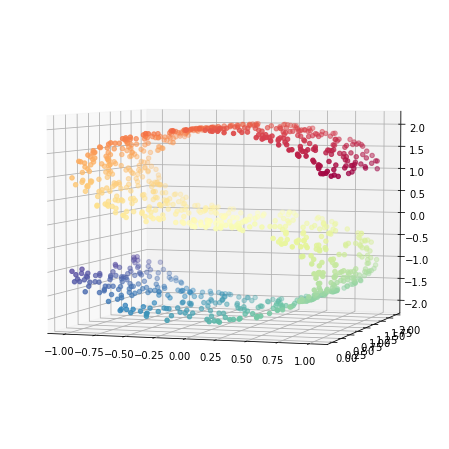

In [2]:
# Visualise data set
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

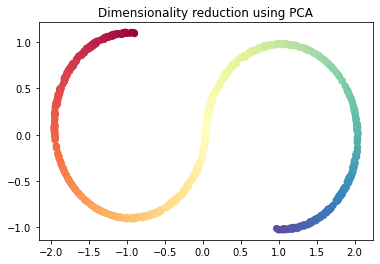

In [3]:
# Try apply PCA
n_components = 2
Y = PCA(n_components).fit_transform(X)
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Dimensionality reduction using PCA")
ax.xaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

In [7]:
n_neighbors = 14
# TODO: apply isomap to perform dimensionality reduction to 2D and plot the result
from sklearn.manifold import Isomap
Y=Isomap(n_neighbors, n_components).fit_transform(X)
Y

C:\Users\microsoft\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=14, n_components=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([[ 4.98979780e-01, -1.84041183e-01],
       [ 2.09257237e+00,  1.07765112e+00],
       [ 1.01618130e+00,  8.82731076e-02],
       ...,
       [ 4.23785097e+00, -4.99760965e-04],
       [-2.56135876e+00, -2.76687020e-01],
       [ 1.72347338e+00,  6.43919146e-02]])

<ipython-input-8-59c78693d5bc>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


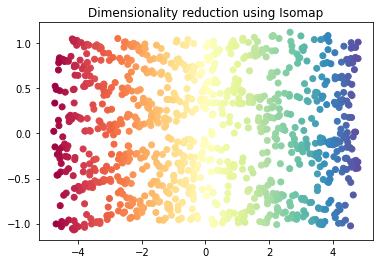

In [8]:
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Dimensionality reduction using Isomap")
ax.xaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

### 5. Locally Linear Embedding
Locally linear embedding (LLE) seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding.

The standard LLE algorithm comprises three stages:

1. Nearest Neighbors Search. 
2. Weight Matrix Construction.
3. Partial Eigenvalue Decomposition. Same as for isomap.

In [10]:
# TODO: apply LLE to perform dimensionality reduction to 2D and plot the result
from sklearn.manifold import LocallyLinearEmbedding
Y=LocallyLinearEmbedding(n_neighbors,n_components).fit_transform(X)
Y

C:\Users\microsoft\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=14, n_components=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([[-0.00526555, -0.01060764],
       [-0.02342247, -0.05929445],
       [-0.01107388, -0.01841883],
       ...,
       [-0.04870688,  0.01123155],
       [ 0.02930726,  0.01054453],
       [-0.01939724, -0.00986243]])

<ipython-input-11-976bac48053e>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)


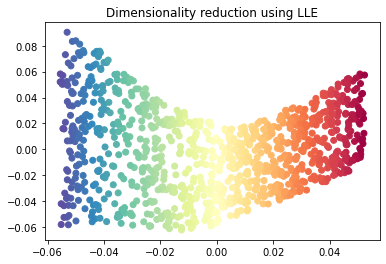

In [11]:
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Dimensionality reduction using LLE")
ax.xaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()